<div style="background-color:rgb(34, 15, 207); border-left: 6px solid #2196F3; padding: 10px;">
1) Explorando os dados


a) Observe os histogramas (distribuições de classe por atributos). No pandas, existe o método describe e, no Weka, os histogramas estão na aba de preprocessamento e os gráficos  de espalhamento na aba “Visualize” (não esqueça de aplicar o jitter). Olhe também as instâncias usando o botão edit e tente visualiza-la por meio de um heatmap1. 
</div>



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Carregando os dados
avaliacao_data = pd.read_csv("mnist_avaliacao.csv")
teste_data = pd.read_csv("mnist_teste.csv")

Descrição dos dados:
         pixel_1_1    pixel_1_2    pixel_1_3    pixel_1_4    pixel_1_5  \
count  2049.000000  2049.000000  2049.000000  2049.000000  2049.000000   
mean      5.418253     5.599317     5.452416     5.510005     5.542704   
std      34.360711    35.502751    34.561946    34.924724    35.135678   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max     251.000000   253.000000   253.000000   254.000000   254.000000   

         pixel_1_6    pixel_1_7    pixel_1_8    pixel_1_9   pixel_1_10  ...  \
count  2049.000000  2049.000000  2049.000000  2049.000000  2049.000000  ...   
mean      5.527086     5.403612     5.579307     5.550512     5.513421  ...   
std      35.024662    34.264219    35.374181    35.190643    34.964895  ...

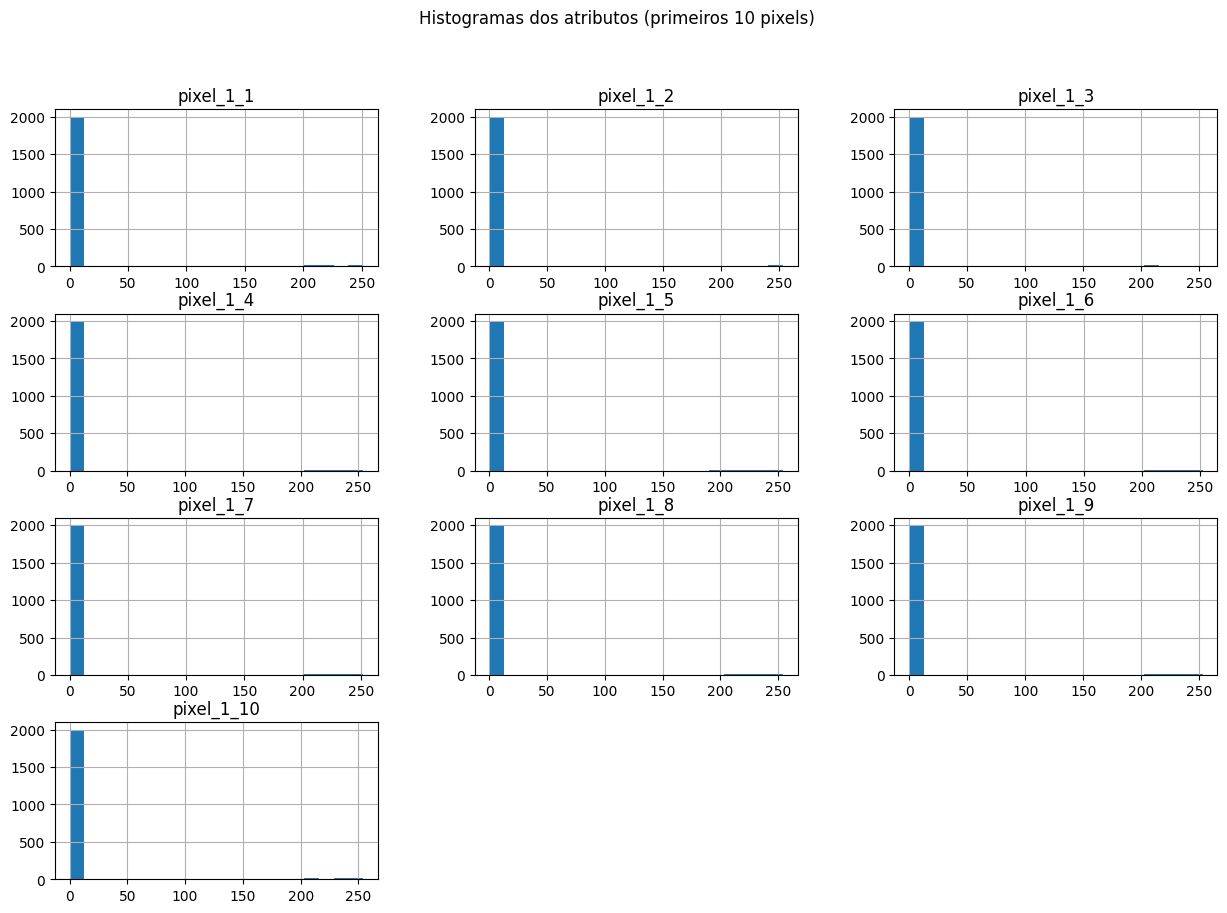

In [11]:
# Observando os histogramas (distribuições de classe por atributos)
print("Descrição dos dados:")
print(avaliacao_data.describe())

# Criando histogramas para os primeiros pixels e a classe
avaliacao_data.hist(column=avaliacao_data.columns[:10], figsize=(15, 10), bins=20)
plt.suptitle("Histogramas dos atributos (primeiros 10 pixels)")
plt.show()

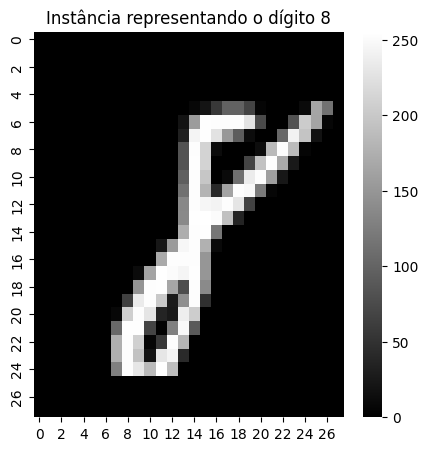

In [12]:
# Visualizando uma instância como heatmap
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(
    np.array(avaliacao_data.iloc[0, :-1]).reshape(28, 28),
    cmap="gray", cbar=True, ax=ax
)
plt.title(f"Instância representando o dígito {avaliacao_data.iloc[0, -1]}")
plt.show()

<div style="background-color:rgb(34, 15, 207); border-left: 6px solid #2196F3; padding: 10px;">
Como o dígito está sendo representado nesta imagem (ou seja, qual cor é o fundo e qual a é a cor do dígito)? Você percebe algo de incomum em alguma instância? 
</div>


R:
No mapa de calor gerado, o dígito é representado como áreas mais claras (valores maiores de pixel, próximos a 255) em um fundo escuro (valores menores de pixel, próximos a 0).

<div style="background-color:rgb(34, 15, 207); border-left: 6px solid #2196F3; padding: 10px;">
Existe alguma instância com atributos que podem representar ruídos? Descreva qualquer características que lhe chame a atenção (dica: pense que valores você esperaria nos pixels de diferentes áreas da imagem). 
</div>


R:
Algumas instâncias apresentam valores inesperados que podem ser considerados ruídos, como regiões do fundo com valores intermediários (50-150), quando o esperado seria 0 (preto). Além disso, os traços dos dígitos, que deveriam ter valores próximos de 255 (branco), estão apagados ou incompletos, o que prejudica a identificação. Esses padrões indicam que algumas imagens contêm atributos que podem representar ruídos.

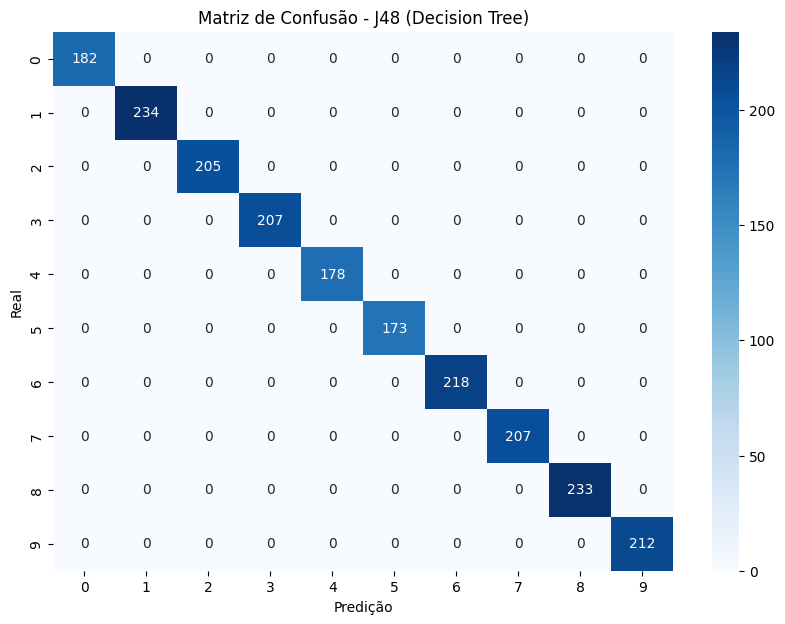


Erros mais comuns para J48 (Decision Tree):
Classes mais difíceis de prever: [9 8 7]


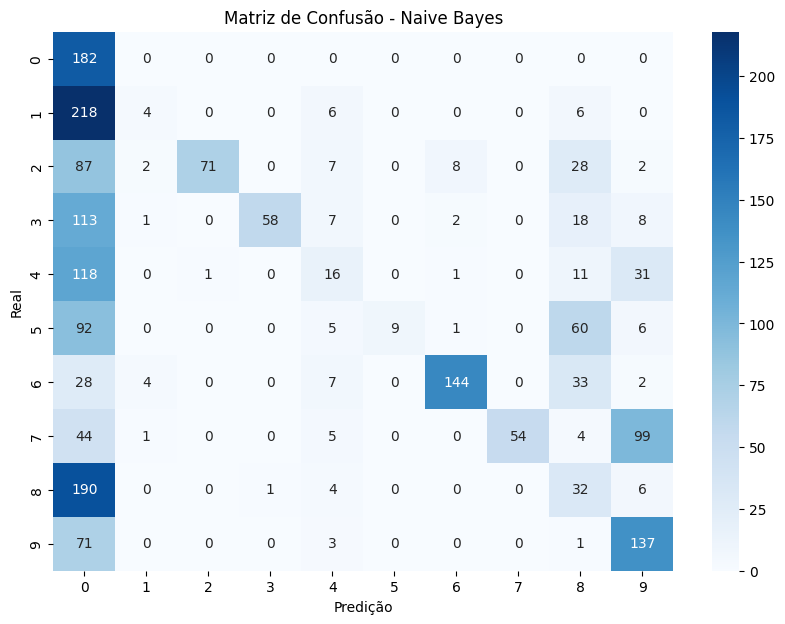


Erros mais comuns para Naive Bayes:
Classes mais difíceis de prever: [1 8 5]
J48 (Decision Tree) - Precisão média: 0.70 ± 0.02
Naive Bayes - Precisão média: 0.34 ± 0.02


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Separar atributos (pixels) e a classe (rótulo do dígito)
X = avaliacao_data.drop(columns=['class'])
y = avaliacao_data['class']

# Definir os métodos
models = {
    'J48 (Decision Tree)': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB()
}

# Avaliar os métodos usando validação cruzada com 5 partições
results = {}
for model_name, model in models.items():
    # Validação cruzada
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    results[model_name] = {
        'accuracy': np.mean(cv_results),
        'std': np.std(cv_results)
    }
    
    # Treinando o modelo e gerando a matriz de confusão
    model.fit(X, y)
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    
    # Visualizando a matriz de confusão
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.xlabel('Predição')
    plt.ylabel('Real')
    plt.show()
    
    # Erros comuns
    errors = np.sum(cm, axis=1) - np.diagonal(cm)
    errors_common = np.argsort(errors)[::-1]  # Classes com mais erros
    print(f'\nErros mais comuns para {model_name}:')
    print(f'Classes mais difíceis de prever: {errors_common[:3]}')

# Resultados de precisão
for model_name, result in results.items():
    print(f'{model_name} - Precisão média: {result["accuracy"]:.2f} ± {result["std"]:.2f}')

<div style="background-color:rgb(34, 15, 207); border-left: 6px solid #2196F3; padding: 10px;">
Qual a precisão geral do método? 
</div>


R:

<div style="background-color:rgb(34, 15, 207); border-left: 6px solid #2196F3; padding: 10px;">
Quais conclusões você tira a partir da matriz de confusão de cada método?
</div>

R:

<div style="background-color:rgb(34, 15, 207); border-left: 6px solid #2196F3; padding: 10px;">
Quais classes são mais fácieis de prever? E a mais difícieis?
</div>

R:

<div style="background-color:rgb(34, 15, 207); border-left: 6px solid #2196F3; padding: 10px;">
Quais são os erros mais comuns em cada metodo? 

</div>

R:

<div style="background-color:rgb(34, 15, 207); border-left: 6px solid #2196F3; padding: 10px;">
2) Seleção e engenharia de atributos
Agora vamos melhorar o modelo explorando os atributos. 

</div>

<div style="background-color:rgb(34, 15, 207); border-left: 6px solid #2196F3; padding: 10px;">
a) No Weka, em Select Atributes, calcule o infogain (Ganho de Informação) de cada atributo. Vá a aba de visualização e observe os gráficos de dispersão entre os atributos mais bem e pior ranqueados contra a classe. Também analise os  histogramas na aba preprocessamento.

</div>


<div style="background-color:rgb(34, 15, 207); border-left: 6px solid #2196F3; padding: 10px;">
Que diferença você nota? Qual região que possui os pixels mais importantes? (Dica: Tente também plotar os valores de  infogain de uma forma que fique fácil de identificar a região que cada pixel representa use um heatmap2). 

</div>